# 01_기본 기능

## 1. OpenAI 라이브러리 설치 확인

In [1]:
# !pip install openai python-dotenv Pillow

## 2. OpenAI 정보 읽기

In [2]:
import os
import openai
from PIL import Image
from dotenv import load_dotenv, find_dotenv
dotenv_path = find_dotenv(filename='././.env')
load_dotenv(dotenv_path=dotenv_path)

openai.api_type = "azure"
openai.api_version = os.getenv("OPENAI_API_VERSION","").strip()

API_KEY = os.getenv("OPENAI_API_KEY","").strip()
assert API_KEY, "ERROR: Azure OpenAI Key is missing"
openai.api_key = API_KEY

RESOURCE_ENDPOINT = os.getenv("OPENAI_API_BASE","").strip()
assert RESOURCE_ENDPOINT, "ERROR: Azure OpenAI Endpoint is missing"
assert "openai.azure.com" in RESOURCE_ENDPOINT.lower(), "ERROR: Azure OpenAI Endpoint should be in the form: \n\n\t<your unique endpoint identifier>.openai.azure.com"
openai.api_base = RESOURCE_ENDPOINT

model=os.getenv('DEPLOYMENT_NAME')

## 3. LLM 특징 - 동일 Prompt, 다양한 Completion

### 동일 Prompt

In [3]:
text_prompt = "Should oxford commas always be used?"

### 시도 1

In [4]:
# !pip install openai==0.28

In [5]:
response = openai.ChatCompletion.create(
  engine=model,
  messages = [{"role":"system", "content":"You are a helpful assistant."},
               {"role":"user","content":text_prompt},])

response['choices'][0]['message']['content']

'The use of Oxford commas, also known as serial commas, is a matter of style and preference. Some style guides, such as The Chicago Manual of Style, recommend using the Oxford comma, while others, like the Associated Press (AP) Stylebook, advise against it. Ultimately, it depends on the style guide you are following or the guidelines set by your organization or publication. If there are no specific guidelines in place, it is generally recommended to use the Oxford comma for clarity and to avoid any potential ambiguity in lists of three or more items.'

### 시도 2

In [6]:
response = openai.ChatCompletion.create(
  engine=model,
  messages = [{"role":"system", "content":"You are a helpful assistant."},
               {"role":"user","content":text_prompt},])

response['choices'][0]['message']['content']

"The use of Oxford commas, also known as serial commas, is a matter of style and personal preference. Some style guides, such as The Chicago Manual of Style, recommend using the Oxford comma consistently to avoid potential ambiguity. Others, including the Associated Press Stylebook, suggest that it can be omitted in simple series of items. Ultimately, it's important to follow the style guide you are using or be consistent in your own writing."

## 4. Openai 기본 파라미터

- mperature (온도):
    - GPT-3의 temperature 매개변수는 생성된 텍스트의 다양성을 조절하는 데 사용됩니다.
        - 낮은 온도(예: 0.1)는 보다 결정적이고 일관된 출력을 생성하도록 모델을 조절합니다.
        - 높은 온도(예: 0.8)는 더 다양하고 창의적인 출력을 유도할 수 있습니다.

- Top-n (Top Tokens):
    - GPT-3의 top_n 매개변수는 다음 토큰을 선택할 때 사용되는 확률 분포의 상위 n개 토큰만을 고려하도록 모델을 제어합니다.
    - top_n을 사용하면 모델이 더 명확한 텍스트를 생성하도록 할 수 있습니다.

### temperature 

In [7]:
def call_openai(num_times, prompt, temperature):
    for i in range(num_times):
        response = openai.ChatCompletion.create(
            engine=model,
            messages = [{"role":"system", "content":"You are a helpful assistant."},
                        {"role":"user","content": prompt}],
                max_tokens=60,
                temperature = temperature
        )
        print(response['choices'][0]['message']['content'])

In [8]:
call_openai(5, 'The best pet is a ', temperature = 1)

subjective topic and can vary depending on a person's preferences, lifestyle, and living situation. Some popular pets include dogs, cats, fish, birds, rabbits, and hamsters. It's important to consider factors such as the pet's needs, level of care required, space available, and time
subjective question that varies depending on an individual's preferences and lifestyle. Some people may consider dogs to be the best pets due to their loyalty and companionship, while others may prefer cats for their independence and low maintenance. Alternatively, some individuals may enjoy having small pets like hamsters or guinea pigs
matter of personal preference and lifestyle. Some people may find that dogs make the best pets because they are loyal, trainable, and offer companionship. Others may prefer cats, as they are independent yet affectionate. For some, smaller animals like guinea pigs, rabbits, or hamsters may make great
subjective topic as it depends on individual preferences, lifestyles, and n

In [9]:
call_openai(5, 'The best pet is a ', temperature = 0)

subjective topic and can vary depending on individual preferences and lifestyles. Some people may prefer dogs as they are loyal, trainable, and provide companionship. Others may prefer cats for their independence, low maintenance, and ability to be left alone for longer periods of time. Other popular pets include birds, fish
subjective topic and can vary depending on individual preferences and lifestyles. Some people may prefer dogs as they are loyal, trainable, and provide companionship. Others may prefer cats for their independence, low maintenance, and ability to be left alone for longer periods of time. Other popular pets include birds, fish
subjective topic and can vary depending on individual preferences and lifestyles. Some people may prefer dogs as they are loyal, trainable, and provide companionship. Others may prefer cats for their independence, low maintenance, and ability to be left alone for longer periods of time. Other popular pets include birds, fish
subjective topic an

### top_p

In [10]:
def call_openai(num_times, prompt, top_p):
    for i in range(num_times):
        response = openai.ChatCompletion.create(
            engine=model,
            messages = [{"role":"system", "content":"You are a helpful assistant."},
                        {"role":"user","content": prompt}],
                max_tokens=60,
                top_p = top_p
        )
        print(response['choices'][0]['message']['content'])

In [11]:
call_openai(5, 'The best pet is a ', top_p = 1)

subjective question and depends on personal preference and lifestyle. However, some popular pets include dogs, cats, hamsters, guinea pigs, birds, and fish. It is important to consider factors such as space, time commitment, allergies, and individual preferences when choosing a pet.
subjective question as it depends on individual preferences. Some popular choices for pets include dogs, cats, fish, birds, and rabbits. Each of these options offers unique qualities and benefits, so it is important to consider factors such as lifestyle, living situation, and personal preferences when choosing the best pet for
personal preference and lifestyle. Some people may prefer dogs because they are loyal and provide companionship. Others may prefer cats because they are independent and low maintenance. Some may prefer small pets like guinea pigs or hamsters because they are easier to take care of. Ultimately, the best pet is one that
subjective topic and depends on individual preferences and lifestyl

In [12]:
call_openai(5, 'The best pet is a ', top_p = 0)

subjective topic and can vary depending on individual preferences and lifestyles. Some people may prefer dogs as they are loyal, trainable, and provide companionship. Others may prefer cats for their independence, low maintenance, and ability to be left alone for longer periods of time. Other popular pets include birds, fish
subjective topic and can vary depending on individual preferences and lifestyles. Some people may prefer dogs as they are loyal, trainable, and provide companionship. Others may prefer cats for their independence, low maintenance, and ability to be left alone for longer periods of time. Other popular pets include birds, fish
subjective topic and can vary depending on individual preferences and lifestyles. Some people may prefer dogs as they are loyal, trainable, and provide companionship. Others may prefer cats for their independence, low maintenance, and ability to be left alone for longer periods of time. Other popular pets include birds, fish
subjective topic an

ValueError: Could not save to JPEG for display

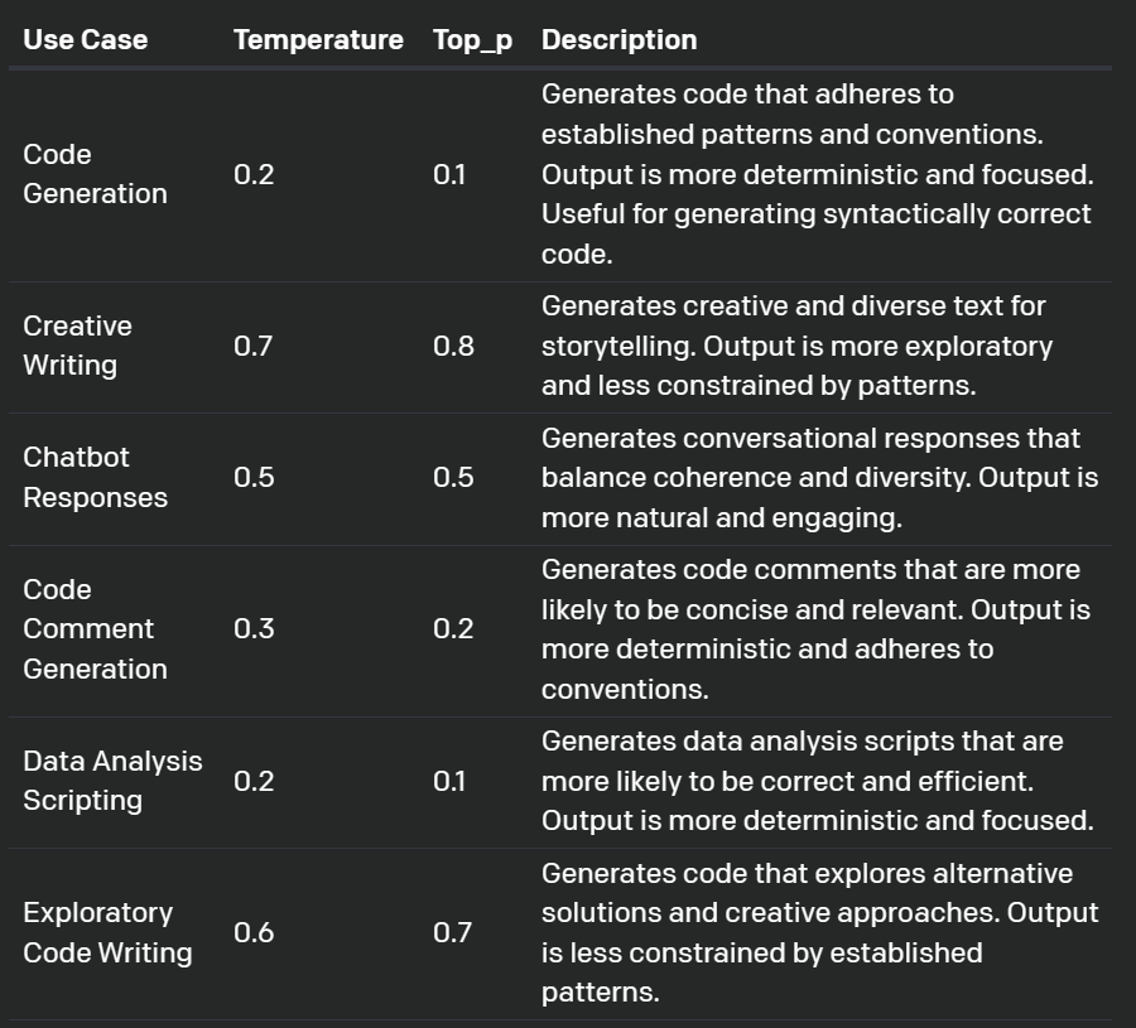

In [32]:
image_path = '../../images/parameter_use_cases.png'
image = Image.open(image_path)
image

### n

In [14]:
response = openai.ChatCompletion.create(
            engine=model,
            messages = [{"role":"system", "content":"You are a helpful assistant."},
                        {"role":"user","content": "The best pet is a "}],
                max_tokens=60,
                n=2
        )

In [15]:
for c in response['choices']:
    print(c['message']['content'])

subjective matter as it depends on individual preferences, lifestyles, and circumstances. Some people may prefer dogs as they are loyal and great companions. Others may prefer cats for their independent nature and lower maintenance. Some individuals may prefer smaller pets such as hamsters or guinea pigs, while others may enjoy the
subjective matter, as it really depends on the individual's lifestyle, preferences, and abilities to care for a pet. However, some popular choices for pets include dogs, cats, rabbits, birds, fish, and hamsters. Each of these pets has its own unique qualities and care requirements, so


## 5. 단순 ChatCompletion JSON 구조 이해

- content_filter_results: 답변 컨텐츠 필터링 가능

In [16]:
text_prompt = "Should oxford commas always be used?"

In [17]:
openai.ChatCompletion.create(
    engine=model,
    max_tokens=60,
    messages=[
        {"role": "user", "content": text_prompt},
    ]
)

<OpenAIObject chat.completion id=chatcmpl-8Nvs4g9z0c5S5sb1zE65LSQ1xCrhV at 0x117d69ea0> JSON: {
  "id": "chatcmpl-8Nvs4g9z0c5S5sb1zE65LSQ1xCrhV",
  "object": "chat.completion",
  "created": 1700714692,
  "model": "gpt-35-turbo-16k",
  "prompt_filter_results": [
    {
      "prompt_index": 0,
      "content_filter_results": {
        "hate": {
          "filtered": false,
          "severity": "safe"
        },
        "self_harm": {
          "filtered": false,
          "severity": "safe"
        },
        "sexual": {
          "filtered": false,
          "severity": "safe"
        },
        "violence": {
          "filtered": false,
          "severity": "safe"
        }
      }
    }
  ],
  "choices": [
    {
      "index": 0,
      "finish_reason": "length",
      "message": {
        "role": "assistant",
        "content": "The use of Oxford commas is a matter of style and preference. Some style guides, such as The Chicago Manual of Style, recommend using the Oxford comma consi

## 6. 기본 Prompt 연습

### 연습 1 - 답변 조정

- 답변 불확실한 경우 대처하는 방식 알려주기

In [18]:
prompt = """Answer the question as truthfully as possible, and if you're unsure of the answer, say "Sorry, I don't know".

Q: Who won the 2020 Summer Olympics men's high jump?
A:"""

In [19]:
response = openai.ChatCompletion.create(
  engine=model,
  messages = [{"role":"system", "content":"You are a helpful assistant."},
               {"role":"user","content":prompt},])

response['choices'][0]['message']['content']

"Sorry, I don't know."

### 연습 2 - 감정 분석

In [20]:
prompt = """Decide whether the following customer feedback is positive or negative.

Q: I was disappointed with the quality of the product. It was very cheaply made and did not meet my expectations at all.
Q: I was happy with this product, it is well made and great quality for the price.
"""

In [21]:
response = openai.ChatCompletion.create(
  engine=model,
  messages = [{"role":"system", "content":"You are a helpful assistant."},
               {"role":"user","content":prompt},])

print(response['choices'][0]['message']['content'])

Customer feedback 1: Negative

Customer feedback 2: Positive


### 연습 3 - 정보 추출

In [22]:
prompt = """List all PII data from following statement:
John Doe is a 35-year old man and he lives at 21 Main Street, New York, NY. He is a software engineer and he works at Microsft. He has a wife named Jane Doe and they have two children
"""

- 개인 데이터 뽑아주기
- 활용사례: 콜센터 상담사 내용을 정리해 컨텐츠 중요항목을 추출해서 정형화된 데이터로 변환해 정형화된 데이터로 DB에 넣어줌

In [23]:
response = openai.ChatCompletion.create(
  engine=model,
  messages = [{"role":"system", "content":"You are a helpful assistant."},
               {"role":"user","content":prompt},])

print(response['choices'][0]['message']['content'])

From the given statement, the Personally Identifiable Information (PII) can be identified as follows:

- Name: John Doe, Jane Doe
- Age: 35
- Address: 21 Main Street, New York, NY
- Occupation: Software engineer
- Employer: Microsoft
- Family details: Wife named Jane Doe and two children

Please note that PII varies depending on legal and regulatory requirements, so it's always important to handle such information with caution and ensure compliance with relevant privacy laws and guidelines.


### 연습 4 - 쉽게 문장 요약하기

#### 'tl;dr:' 추가로 간단히 문장 요약하기  
TL;DR, "too long; didn't read"(너무 길어서 읽지 않았다)는 뜻으로, Prompt 문장 마지막에 입력하면 문장을 요약해 줌

In [33]:
# prompt 맨 뒤에 \n\nTl;dr" 넣어주니까 내용 요약해줌

prompt = "Recent work has demonstrated substantial gains on many NLP tasks and benchmarks by pre-training on a large corpus of text followed by fine-tuning on a specific task. While typically task-agnostic in architecture, this method still requires task-specific fine-tuning datasets of thousands or tens of thousands of examples. By contrast, humans can generally perform a new language task from only a few examples or from simple instructions - something which current NLP systems still largely struggle to do. Here we show that scaling up language models greatly improves task-agnostic, few-shot performance, sometimes even reaching competitiveness with prior state-of-the-art fine-tuning approaches.\n\nTl;dr"


In [25]:
response = openai.ChatCompletion.create(
  engine=model,
  messages = [{"role":"system", "content":"You are a helpful assistant."},
               {"role":"user","content":prompt},])

response['choices'][0]['message']['content']

'Recent work has shown that pre-training models on a large corpus of text and then fine-tuning them on specific tasks leads to significant improvements in natural language processing (NLP) tasks. However, this approach still requires task-specific fine-tuning datasets with thousands of examples. In contrast, humans can perform new language tasks with only a few examples or instructions, which current NLP systems struggle to do. Scaling up language models can greatly enhance their ability to perform tasks with few examples, even rivaling existing fine-tuning approaches.'

### 연습 5 - 문장 카테고리 분류

#### 카테고리 리스트 제공을 통한 문장 분류  
- 활용사례: 이력서 내면 이력서 카테고리 분류
- 이력서 풀 관리 효율화

In [26]:
prompt = "Classify the following inquiry into one of the following: categories: [Pricing, Hardware Support, Software Support]\n\ninquiry: Hello, one of the keys on my laptop keyboard broke recently and I'll need a replacement:\n\nClassified category:"
print(prompt)

Classify the following inquiry into one of the following: categories: [Pricing, Hardware Support, Software Support]

inquiry: Hello, one of the keys on my laptop keyboard broke recently and I'll need a replacement:

Classified category:


In [27]:
response = openai.ChatCompletion.create(
  engine=model,
  messages = [{"role":"system", "content":"You are a helpful assistant."},
               {"role":"user","content":prompt},])

response['choices'][0]['message']['content']

'Hardware Support'

### 연습 6 - 새로운 항목 생성

#### 사례 제공을 통한 새로운 항목 생성

In [28]:
prompt = "Product description: A home milkshake maker\nSeed words: fast, healthy, compact.\nProduct names: HomeShaker, Fit Shaker, QuickShake, Shake Maker\n\nProduct description: A pair of shoes that can fit any foot size.\nSeed words: adaptable, fit, omni-fit."
print(prompt)

Product description: A home milkshake maker
Seed words: fast, healthy, compact.
Product names: HomeShaker, Fit Shaker, QuickShake, Shake Maker

Product description: A pair of shoes that can fit any foot size.
Seed words: adaptable, fit, omni-fit.


In [29]:
response = openai.ChatCompletion.create(
  engine=model,
  messages = [{"role":"system", "content":"You are a helpful assistant."},
               {"role":"user","content":prompt},]
)
response['choices'][0]['message']['content']

'Product names: FlexFit Shoes, OmniFit Footwear, Perfect Fit Shoes, Adapt-Size Shoes'